In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

df = pd.read_csv('./london_weather.csv')
df.drop(columns = ['snow_depth'], inplace = True)
df.dropna(inplace= True)
df.reset_index(drop=True, inplace=True)

#get mean monthly temp
df['date'] = pd.to_datetime(df['date'],format='%Y%m%d')
df['month'] = pd.DatetimeIndex(df['date']).month
df['year'] = pd.DatetimeIndex(df['date']).year
df['month_year'] = pd.to_datetime(df['date']).dt.to_period('M')
df=df.groupby('month_year').mean()

df

C:\Users\CJyM2\AppData\Local\Temp\ipykernel_28076\467259643.py:20: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df=df.groupby('month_year').mean()


,cloud_cover,sunshine,global_radiation,max_temp,mean_temp,min_temp,precipitation,pressure,month,year
month_year,,,,,,,,,,
1979-01,5.724138,2.017241,29.965517,4.144828,0.527586,-2.641379,2.058621,101120.689655,1.0,1979.0
1979-02,6.360000,1.948000,45.440000,4.428000,2.028000,-0.348000,1.744000,101061.600000,2.0,1979.0
1979-03,5.967742,3.212903,93.354839,9.238710,5.587097,1.993548,3.061290,100459.032258,3.0,1979.0
1979-04,6.133333,3.543333,134.166667,12.520000,8.743333,4.810000,2.586667,101165.333333,4.0,1979.0
1979-05,5.290323,6.470968,204.064516,16.206452,11.490323,7.151613,2.806452,101362.580645,5.0,1979.0
...,...,...,...,...,...,...,...,...,...,...
2020-08,5.066667,5.976667,208.100000,25.200000,20.393333,15.640000,1.873333,101219.333333,8.0,2020.0
2020-09,4.200000,6.540000,170.000000,21.693333,16.616667,11.580000,0.640000,101695.000000,9.0,2020.0
2020-10,5.733333,1.780000,70.533333,14.970000,11.933333,8.933333,4.773333,100794.333333,10.0,2020.0


# testing 2

In [2]:
# Split data into train / test sets
n=int(len(df)*0.2)
train = df.iloc[:len(df)-n]
test = df.iloc[len(df)-n:]
test

,cloud_cover,sunshine,global_radiation,max_temp,mean_temp,min_temp,precipitation,pressure,month,year
month_year,,,,,,,,,,
2012-09,3.500000,5.963333,135.733333,19.770000,15.133333,10.276667,1.373333,101508.333333,9.0,2012.0
2012-10,5.967742,2.761290,64.967742,14.006452,11.125806,7.961290,2.851613,100992.580645,10.0,2012.0
2012-11,5.133333,2.513333,39.666667,10.826667,7.803333,4.580000,2.393333,100957.333333,11.0,2012.0
2012-12,5.129032,1.870968,24.870968,9.038710,5.812903,2.606452,3.090323,100823.870968,12.0,2012.0
2013-01,6.387097,1.112903,24.580645,6.529032,4.296774,2.016129,1.616129,101362.580645,1.0,2013.0
...,...,...,...,...,...,...,...,...,...,...
2020-08,5.066667,5.976667,208.100000,25.200000,20.393333,15.640000,1.873333,101219.333333,8.0,2020.0
2020-09,4.200000,6.540000,170.000000,21.693333,16.616667,11.580000,0.640000,101695.000000,9.0,2020.0
2020-10,5.733333,1.780000,70.533333,14.970000,11.933333,8.933333,4.773333,100794.333333,10.0,2020.0


In [ ]:
"""# Import the library
from pmdarima import auto_arima
  
# Ignore harmless warnings
import warnings
warnings.filterwarnings("ignore")

  
# Fit auto_arima function to AirPassengers dataset
stepwise_fit = auto_arima(y=train['mean_temp'], 
                          xreg=train[['min_temp']],
                          start_p = 1, start_q = 1,
                          max_p = 3, max_q = 3, m = 12,
                          start_P = 0, seasonal = True,
                          d = None, D = 0, trace = True,
                          test='adf',
                          error_action ='ignore',   # we don't want to know if an order does not work
                          suppress_warnings = True,  # we don't want convergence warnings
                          stepwise = True)           # set to stepwise
  
# To print the summary
stepwise_fit.summary()"""

In [18]:
#build up ARIMA 

from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
import statsmodels.api as sm


model = sm.tsa.VARMAX(
                endog = train[['mean_temp', 'min_temp', 'max_temp', 'cloud_cover', 'sunshine',  'precipitation']],
                order = (12, 4), 
                seasonal_order =(12, 0, 4, 12)
)
  
result = model.fit(maxiter=2000, disp=False)
result.summary()

C:\Users\CJyM2\Documents\anaconda\envs\ARIMA\lib\site-packages\statsmodels\tsa\statespace\varmax.py:161: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  warn('Estimation of VARMA(p,q) models is not generically robust,'
C:\Users\CJyM2\Documents\anaconda\envs\ARIMA\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Dep. Variable:,"['mean_temp', 'min_temp', 'max_temp', 'cloud_cover', 'sunshine', 'precipitation']",No. Observations:,404
Model:,"VARMA(12,4)",Log Likelihood,-1415.693
,+ intercept,AIC,4037.385
Date:,"Wed, 05 Apr 2023",BIC,6450.238
Time:,20:54:16,HQIC,4992.532
Sample:,01-31-1979,,
,- 08-31-2012,,
Covariance Type:,opg,,
Ljung-Box (L1) (Q):,"0.00, 0.00, 0.08, 0.12, 0.01, 0.04",Jarque-Bera (JB):,"0.20, 0.85, 1.34, 0.57, 2.79, 46.40"
Prob(Q):,"0.96, 0.97, 0.78, 0.73, 0.91, 0.83",Prob(JB):,"0.90, 0.65, 0.51, 0.75, 0.25, 0.00"
Heteroskedasticity (H):,"0.76, 1.16, 0.96, 0.92, 0.79, 0.74",Skew:,"0.05, 0.06, -0.14, 0.07, -0.14, 0.65"


In [19]:
result.aic

4037.38522602536

# prediction 5 year

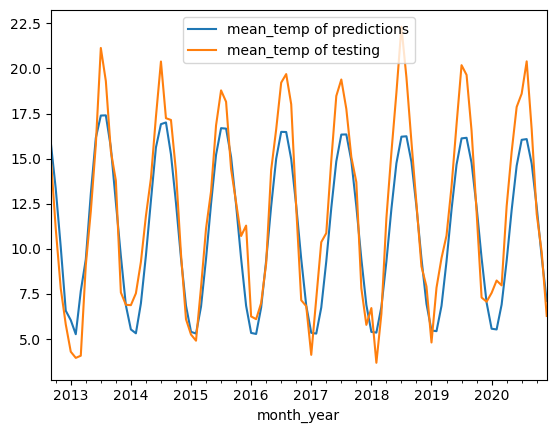

In [20]:
#Predictions of ARIMA Model against the test set
start = len(train)
end = len(df)+60

# Predictions for one-year against the test set
predictions = result.predict(start, end, dynamic=True, return_conf_int=True
                             )

# plot predictions and actual values
predictions['mean_temp'].iloc[:len(test)].plot(legend = True)
test['mean_temp'].plot(legend = True)

plt.legend(["mean_temp of predictions", "mean_temp of testing"])

plt.show()

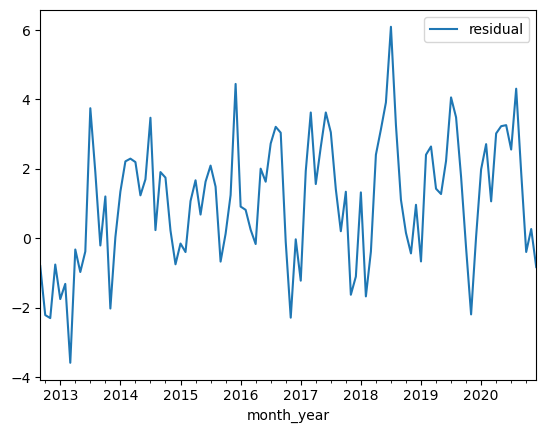

In [21]:
#plt.scatter(test['mean_temp']-predictions['mean_temp'],predictions['mean_temp'])
#AIC(drink.fit)
residual=test['mean_temp']-predictions['mean_temp'].iloc[:len(test)]
residual.plot(legend = True)
plt.legend(["residual"])
plt.show()

In [22]:
#Evaluate the model using MSE and RMSE
# Load specific evaluation tools
from sklearn.metrics import mean_squared_error
from statsmodels.tools.eval_measures import rmse
  
# Calculate root mean squared error
RMSE=rmse(test["mean_temp"], predictions["mean_temp"].iloc[:len(test)])
  
# Calculate mean squared error
ERROR=mean_squared_error(test["mean_temp"], predictions["mean_temp"].iloc[:len(test)])

In [23]:
ERROR

4.447688837735854

In [24]:
RMSE

2.108954441835066

# forecasting 5 years

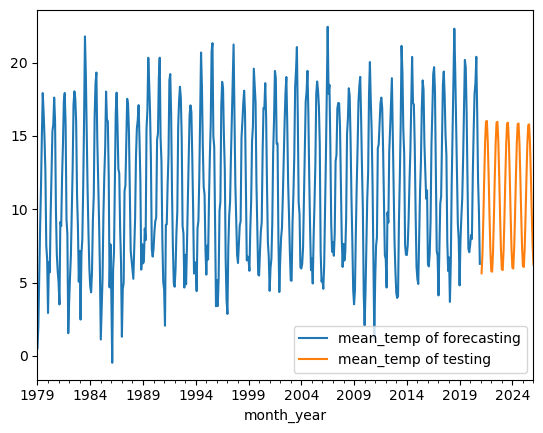

In [25]:
df['mean_temp'].plot(legend = True)
predictions['mean_temp'].iloc[-60:].plot(legend = True)

plt.legend(["mean_temp of forecasting", "mean_temp of testing"])
plt.show()

In [26]:
predictions

,mean_temp,min_temp,max_temp,cloud_cover,sunshine,precipitation
2012-09,15.931680,11.641771,20.187006,4.344225,4.725643,1.931149
2012-10,13.337330,9.531117,16.983429,4.657259,3.700089,1.280203
2012-11,10.101455,6.639535,13.507534,4.821396,2.595940,2.118975
2012-12,6.568700,3.852876,9.164385,5.499708,1.161910,2.438491
2013-01,6.046635,2.917901,9.126709,5.040765,2.273216,1.689626
...,...,...,...,...,...,...
2025-09,14.564431,10.416998,18.645459,5.041545,4.662982,1.795590
2025-10,12.375340,8.603648,16.061156,5.163137,3.720773,1.850157
2025-11,9.813317,6.386914,13.154096,5.296658,2.862234,1.862766
2025-12,7.565048,4.361238,10.703094,5.406606,2.317172,1.830121


In [27]:
test

,cloud_cover,sunshine,global_radiation,max_temp,mean_temp,min_temp,precipitation,pressure,month,year
month_year,,,,,,,,,,
2012-09,3.500000,5.963333,135.733333,19.770000,15.133333,10.276667,1.373333,101508.333333,9.0,2012.0
2012-10,5.967742,2.761290,64.967742,14.006452,11.125806,7.961290,2.851613,100992.580645,10.0,2012.0
2012-11,5.133333,2.513333,39.666667,10.826667,7.803333,4.580000,2.393333,100957.333333,11.0,2012.0
2012-12,5.129032,1.870968,24.870968,9.038710,5.812903,2.606452,3.090323,100823.870968,12.0,2012.0
2013-01,6.387097,1.112903,24.580645,6.529032,4.296774,2.016129,1.616129,101362.580645,1.0,2013.0
...,...,...,...,...,...,...,...,...,...,...
2020-08,5.066667,5.976667,208.100000,25.200000,20.393333,15.640000,1.873333,101219.333333,8.0,2020.0
2020-09,4.200000,6.540000,170.000000,21.693333,16.616667,11.580000,0.640000,101695.000000,9.0,2020.0
2020-10,5.733333,1.780000,70.533333,14.970000,11.933333,8.933333,4.773333,100794.333333,10.0,2020.0
